/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


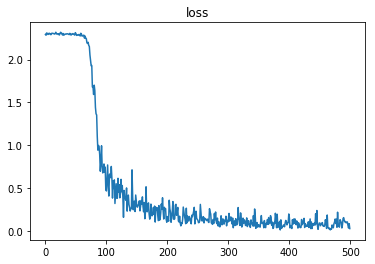

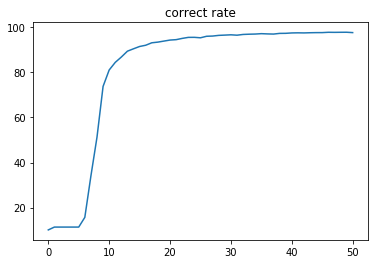

In [5]:
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn.functional as F
import torch
import torchvision
import numpy
import matplotlib.pyplot as plt
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(
        root='.', train=True, download=True,
        transform=transforms.Compose([
            transforms.ToTensor(),
            # transforms.Normalize((0.1307,), (0.3081,))
        ])
    ),
    batch_size=64,
    shuffle=True,
    num_workers=4
)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(
        root='.', train=False, download=True,
        transform=transforms.Compose([
            transforms.ToTensor(),
            # transforms.Normalize((0.1307,), (0.3081,))
        ])
    ),
    batch_size=64,
    shuffle=True,
    num_workers=4
)

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # 1@32*32
        self.C1=nn.Conv2d(1,6,5,padding=2)
        # 6@28*28
        self.S2=nn.MaxPool2d(kernel_size=2)
        # 6@14*14
        self.C3=nn.Conv2d(6,16,5)
        # 16@10*10
        self.S4=nn.MaxPool2d(kernel_size=2)
        # 16@5*5
        self.C5=nn.Conv2d(16,120,5)
        # 120@1*1
        self.F6=nn.Linear(120,84)
        self.F7=nn.Linear(84,10)

    def forward(self, x):
        x=self.C1(x)
        x=torch.sigmoid(self.S2(x))
        x=self.C3(x)
        x=torch.sigmoid(self.S4(x))
        x=self.C5(x)
        x=x.view(-1,120)
        x=torch.tanh(self.F6(x))
        x=F.log_softmax(self.F7(x),dim=1)
        return x

      
      
trains=50
lr=0.01
model = LeNet5().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)

loss_list=[]
correct_list=[]
def train():
    model.train()
    for batch_index, (data, label) in enumerate(train_loader):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, label)
        loss.backward()
        optimizer.step()
        if batch_index%100==0:
            loss_list.append(loss.item())
            # print(loss.item())        
    pass


def test():
    with torch.no_grad():
        model.eval()
        test_loss = 0
        correct = 0
        for data, label in test_loader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, label, size_average=False).item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(label.view_as(pred)).sum().item()
        correct_list.append(100.*correct/len(test_loader.dataset))

def main():
    test()
    plt.title("loss")
    for n in range(trains):
        train()
        test()
    plt.plot(loss_list)
    plt.show()
    plt.title("correct rate")
    plt.plot(correct_list)
    plt.show()
    pass


if __name__ == "__main__":
    main()
